In [1]:
import wrangle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Acquire Data
df, train, validate, test = wrangle.wrangle_data()

Opening data from local file.


In [3]:
df

,year,month,customer_age,customer_gender,country,state,product_category,sub_category,quantity,unit_cost,...,sub_category_Shorts,sub_category_Socks,sub_category_Tires and Tubes,sub_category_Touring Bikes,sub_category_Vests,customer_gender_M,country_Germany,country_United Kingdom,country_United States,product_category_encoded
0,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,1,80.00,...,0,0,1,0,0,0,0,0,1,0
1,2016,February,29,F,United States,Washington,Clothing,Gloves,2,24.50,...,0,0,0,0,0,0,0,0,1,2
2,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,3,3.67,...,0,0,1,0,0,0,0,0,1,0
3,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,2,87.50,...,0,0,1,0,0,0,0,0,1,0
4,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,3,35.00,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34861,2015,March,38,M,France,Charente-Maritime,Bikes,Mountain Bikes,1,2049.00,...,0,0,0,0,0,1,0,0,0,1
34862,2016,February,38,M,France,Hauts de Seine,Bikes,Mountain Bikes,2,1160.00,...,0,0,0,0,0,1,0,0,0,1
34863,2015,March,38,M,France,Hauts de Seine,Bikes,Mountain Bikes,1,2049.00,...,0,0,0,0,0,1,0,0,0,1
34864,2015,April,38,M,France,Hauts de Seine,Bikes,Mountain Bikes,3,683.00,...,0,0,0,0,0,1,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34866 entries, 0 to 34865
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            34866 non-null  int64  
 1   month                           34866 non-null  object 
 2   customer_age                    34866 non-null  int64  
 3   customer_gender                 34866 non-null  object 
 4   country                         34866 non-null  object 
 5   state                           34866 non-null  object 
 6   product_category                34866 non-null  object 
 7   sub_category                    34866 non-null  object 
 8   quantity                        34866 non-null  int64  
 9   unit_cost                       34866 non-null  float64
 10  unit_price                      34866 non-null  float64
 11  cost                            34866 non-null  float64
 12  revenue                         

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

def perform_clustering(df):
    """
    Perform clustering on the input DataFrame using t-SNE for dimensionality reduction.

    Parameters:
        df (pandas.DataFrame): Input DataFrame.

    Returns:
        pandas.DataFrame: DataFrame with an additional 'cluster' column.
    """

    # Encode categorical columns
    le = LabelEncoder()
    df['customer_gender'] = le.fit_transform(df['customer_gender'])
    df['country'] = le.fit_transform(df['country'])
    df['state'] = le.fit_transform(df['state'])
    df['product_category'] = le.fit_transform(df['product_category'])
    df['sub_category'] = le.fit_transform(df['sub_category'])
    df['month'] = le.fit_transform(df['month'])

    # Feature Selection
    data = df[['customer_age', 'sub_category', 'revenue']]  # Select relevant columns

    # Standardization
    scaler = StandardScaler()
    X = scaler.fit_transform(data)

    # Clustering Algorithm (K-means)
    k = 4  # Number of clusters
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)

    # Add 'cluster' column to the DataFrame
    df['cluster'] = labels

    return df

In [7]:
perform_clustering(df)

,year,month,customer_age,customer_gender,country,state,product_category,sub_category,quantity,unit_cost,...,sub_category_Socks,sub_category_Tires and Tubes,sub_category_Touring Bikes,sub_category_Vests,customer_gender_M,country_Germany,country_United Kingdom,country_United States,product_category_encoded,cluster
0,2016,3,29,0,3,42,0,14,1,80.00,...,0,1,0,0,0,0,0,1,0,1
1,2016,3,29,0,3,42,2,6,2,24.50,...,0,0,0,0,0,0,0,1,2,2
2,2016,3,29,0,3,42,0,14,3,3.67,...,0,1,0,0,0,0,0,1,0,1
3,2016,7,29,0,3,42,0,14,2,87.50,...,0,1,0,0,0,0,0,1,0,1
4,2016,7,29,0,3,42,0,14,3,35.00,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34861,2015,7,38,1,0,5,1,10,1,2049.00,...,0,0,0,0,1,0,0,0,1,3
34862,2016,3,38,1,0,12,1,10,2,1160.00,...,0,0,0,0,1,0,0,0,1,3
34863,2015,7,38,1,0,12,1,10,1,2049.00,...,0,0,0,0,1,0,0,0,1,3
34864,2015,0,38,1,0,12,1,10,3,683.00,...,0,0,0,0,1,0,0,0,1,3


In [8]:
def calculate_cluster_means(df, label):
    """
    Calculate the mean values of the selected features for each cluster.

    Parameters:
        df (pandas.DataFrame): DataFrame with the 'cluster' column.
        label (numpy.array): Cluster labels.

    Returns:
        None
    """
    k = len(np.unique(label))  # Get the number of clusters

    for cluster in range(k):  # Iterate over each cluster
        cluster_data = df[label == cluster]  # Select data points belonging to the current cluster
        cluster_mean = cluster_data.mean(axis=0)  # Calculate the mean values for each feature in the cluster
        print(f"Cluster {cluster + 1} Mean:")  # Print the cluster number
        print(cluster_mean)  # Print the mean values
        print()  # Print a new line for readability

# Perform clustering
clustered_df = perform_clustering(df)

# Extract necessary variables for plotting
label = clustered_df['cluster']

In [9]:
calculate_cluster_means(clustered_df, label)

Cluster 1 Mean:
year                               2015.581007
month                                 5.357420
customer_age                         49.664218
customer_gender                       0.486977
country                               2.243355
state                                17.688393
product_category                      0.399359
sub_category                         11.821424
quantity                              2.011086
unit_cost                           231.745280
unit_price                          265.579217
cost                                382.536129
revenue                             438.474556
record_id                         26033.297449
profit                               55.938427
sub_category_Bike Stands              0.000401
sub_category_Bottles and Cages        0.009082
sub_category_Caps                     0.005343
sub_category_Cleaners                 0.004408
sub_category_Fenders                  0.014158
sub_category_Gloves                   0.0110

/Users/tux/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/tux/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


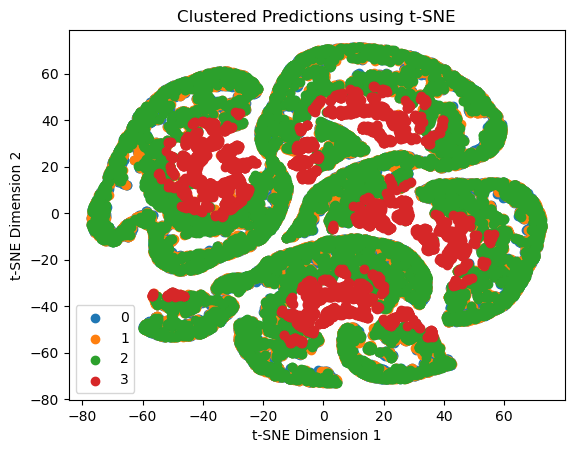

Cluster 1 Mean:
year                               2015.619082
month                                 5.357700
customer_age                         35.235262
customer_gender                       0.517685
country                               2.118447
state                                17.171413
product_category                      0.343733
sub_category                          3.691366
quantity                              1.992926
unit_cost                           140.906376
unit_price                          171.805178
cost                                231.376383
revenue                             282.030746
record_id                         25941.170778
profit                               50.654362
sub_category_Bike Stands              0.011518
sub_category_Bottles and Cages        0.474515
sub_category_Caps                     0.133956
sub_category_Cleaners                 0.046526
sub_category_Fenders                  0.059496
sub_category_Gloves                   0.0360

In [10]:
def plot_clustered_predictions(df, label, df_tsne):
    """
    Plot the clustered predictions using t-SNE.

    Parameters:
        df (pandas.DataFrame): DataFrame with the 'cluster' column.
        label (numpy.array): Cluster labels.
        df_tsne (numpy.array): t-SNE dimensionality reduction result.

    Returns:
        None
    """
    u_labels = np.unique(label)

    # Plotting the results
    for i in u_labels:
        plt.scatter(df_tsne[label == i, 0], df_tsne[label == i, 1], label=i)
    plt.legend()
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.title('Clustered Predictions using t-SNE')
    plt.show()

# Perform clustering
clustered_df = perform_clustering(df)

# Extract necessary variables for plotting
label = clustered_df['cluster']
tsne = TSNE(n_components=2, perplexity=45)
df_tsne = tsne.fit_transform(df)  # Obtain t-SNE dimensionality reduction result

# Plot the clustered predictions
plot_clustered_predictions(clustered_df, label, df_tsne)

# Calculate cluster means
calculate_cluster_means(clustered_df, label)

# Calculate silhouette score
silhouette_avg = silhouette_score(clustered_df, label)
print(f"Silhouette Score: {silhouette_avg:.3f}")

In [11]:
def calculate_silhouette_score(df, label):
    """
    Calculate the silhouette score for the clustering results.

    Parameters:
        df (pandas.DataFrame): DataFrame with the 'cluster' column.
        label (numpy.array): Cluster labels.

    Returns:
        float: Silhouette score.
    """
    silhouette_avg = silhouette_score(df, label)
    return silhouette_avg

In [12]:
calculate_silhouette_score(df, label)

0.0012261974389292931

In [13]:
def perform_clustering_with_visualization(df):
    """
    Perform clustering on the input DataFrame using t-SNE for dimensionality reduction,
    plot the clustered predictions, calculate cluster means, and the silhouette score.

    Parameters:
        df (pandas.DataFrame): Input DataFrame.

    Returns:
        None
    """
    df = perform_clustering(df)
    tsne = TSNE(n_components=2, perplexity=60)
    df_tsne = tsne.fit_transform(df)
    kmeans = KMeans(n_clusters=4)
    label = kmeans.fit_predict(df_tsne)
    plot_clustered_predictions(df, label, df_tsne)
    calculate_cluster_means(df, label)
    silhouette_avg = calculate_silhouette_score(df, label)
    print(f"Silhouette Score: {silhouette_avg:.3f}")

/Users/tux/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/tux/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


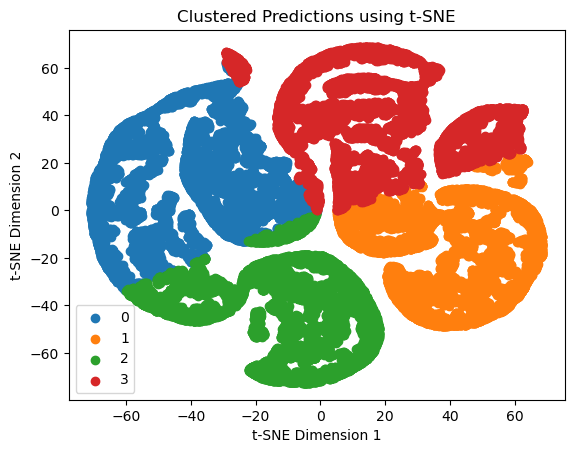

Cluster 1 Mean:
year                               2015.564902
month                                 5.321750
customer_age                         36.514309
customer_gender                       0.510221
country                               2.053352
state                                17.266762
product_category                      0.555397
sub_category                          9.557543
quantity                              2.007359
unit_cost                           430.918621
unit_price                          475.401977
cost                                710.302228
revenue                             785.484158
record_id                         18649.448181
profit                               75.181930
sub_category_Bike Stands              0.004191
sub_category_Bottles and Cages        0.126942
sub_category_Caps                     0.037204
sub_category_Cleaners                 0.012878
sub_category_Fenders                  0.023712
sub_category_Gloves                   0.0140

In [14]:
perform_clustering_with_visualization(df)

In [ ]:
df.info()

In [15]:
df = df.reset_index(drop=True)

In [16]:
# Explore Relationships
def explore_relationships(df):
    category_revenue = df.groupby('product_category')['revenue'].sum()
    gender_quantity = df.groupby('customer_gender')['quantity'].sum()
    return category_revenue, gender_quantity


def explore_relationships_2(df):
    category_profit = df.groupby('product_category')['profit'].sum()
    age_revenue = df.groupby('customer_age')['revenue'].sum()
    return category_profit, age_revenue


def explore_relationships_3(df):
    category_cost = df.groupby('product_category')['cost'].sum()
    country_revenue = df.groupby('country')['revenue'].sum()
    return category_cost, country_revenue


def explore_relationships_4(df):
    sub_category_quantity = df.groupby('sub_category')['quantity'].sum()
    month_revenue = df.groupby('month')['revenue'].sum()
    return sub_category_quantity, month_revenue


def explore_relationships_5(df):
    sub_category_profit = df.groupby('sub_category')['profit'].sum().reset_index()
    year_revenue = df.groupby('year')['revenue'].sum().reset_index()
    return sub_category_profit, year_revenue

def explore_relationships_6(df):
    age_gender_quantity = df.groupby(['customer_age', 'customer_gender'])['quantity'].sum()
    return age_gender_quantity.unstack()

def explore_relationships_7(df):
    gender_country_revenue = df.groupby(['customer_gender', 'country'])['revenue'].sum()
    return gender_country_revenue

def explore_relationships_8(df):
    category_state_quantity = df.groupby(['product_category', 'state'])['quantity'].sum()
    return category_state_quantity

def explore_relationships_9(df):
    sub_category_unit_price = df.groupby('sub_category')['unit_price'].mean()
    return sub_category_unit_price

def explore_relationships_10(df):
    age_profit = df.groupby('customer_age')['profit'].sum()
    return age_profit

def explore_relationships_11(df):
    country_cost = df.groupby('country')['cost'].sum()
    return country_cost

def explore_relationships_12(df):
    month_revenue = df.groupby('month')['revenue'].sum()
    return month_revenue

# Call explore_relationship functions
category_revenue, gender_quantity = explore_relationships(df)
category_profit, age_revenue = explore_relationships_2(df)
category_cost, country_revenue = explore_relationships_3(df)
sub_category_quantity, month_revenue = explore_relationships_4(df)
sub_category_profit, year_revenue = explore_relationships_5(df)
category_revenue, gender_quantity = explore_relationships(df)
category_profit, age_revenue = explore_relationships_2(df)
category_cost, country_revenue = explore_relationships_3(df)
sub_category_quantity, month_revenue = explore_relationships_4(df)
age_gender_quantity = explore_relationships_5(df)
gender_country_revenue = explore_relationships_6(df)
category_state_quantity = explore_relationships_7(df)
sub_category_unit_price = explore_relationships_8(df)
age_profit = explore_relationships_9(df)
country_cost = explore_relationships_10(df)
month_revenue = explore_relationships_11(df)

# Call explore_relationship functions
category_revenue, gender_quantity = explore_relationships(df)
print("Explore Relationship 1: Category Revenue")
print(category_revenue)
print()

category_profit, age_revenue = explore_relationships_2(df)
print("Explore Relationship 2: Category Profit")
print(category_profit)
print()

print("Explore Relationship 3: Category Cost")
print(category_cost)
print()

sub_category_quantity, month_revenue = explore_relationships_4(df)
print("Explore Relationship 4: Sub-Category Quantity")
print(sub_category_quantity)
print()

category_revenue, gender_quantity = explore_relationships(df)
print("Explore Relationship 6: Category Revenue")
print(category_revenue)
print()

category_profit, age_revenue = explore_relationships_2(df)
print("Explore Relationship 7: Category Profit")
print(category_profit)
print()

category_cost, country_revenue = explore_relationships_3(df)
print("Explore Relationship 8: Category Cost")
print(category_cost)
print()

sub_category_quantity, month_revenue = explore_relationships_4(df)
print("Explore Relationship 9: Sub-Category Quantity")
print(sub_category_quantity)
print()

age_gender_quantity = explore_relationships_5(df)
print("Explore Relationship 10: Age-Gender Quantity")
print(age_gender_quantity)
print()

gender_country_revenue = explore_relationships_6(df)
print("Explore Relationship 11: Gender-Country Revenue")
print(gender_country_revenue)
print()

category_state_quantity = explore_relationships_7(df)
print("Explore Relationship 12: Category-State Quantity")
print(category_state_quantity)
print()

sub_category_unit_price = explore_relationships_8(df)
print("Explore Relationship 13: Sub-Category Unit Price")
print(sub_category_unit_price)
print()

age_profit = explore_relationships_9(df)
print("Explore Relationship 14: Age Profit")
print(age_profit)
print()

country_cost = explore_relationships_10(df)
print("Explore Relationship 15: Country Cost")
print(country_cost)
print()

month_revenue = explore_relationships_11(df)
print("Explore Relationship 16: Month Revenue")
print(month_revenue)
print()

Explore Relationship 1: Category Revenue
product_category
0     7420664.0
1    11486355.0
2     3437557.0
Name: revenue, dtype: float64

Explore Relationship 2: Category Profit
product_category
0    1378769.0
1     337601.0
2     545232.0
Name: profit, dtype: float64

Explore Relationship 3: Category Cost
product_category
0     6041895.0
1    11148754.0
2     2892325.0
Name: cost, dtype: float64

Explore Relationship 4: Sub-Category Quantity
sub_category
0       204
1       304
2     10558
3      3020
4      1102
5      1494
6       913
7      8387
8       786
9      4033
10     5499
11     6119
12     1129
13      750
14    22213
15     2673
16      636
Name: quantity, dtype: int64

Explore Relationship 6: Category Revenue
product_category
0     7420664.0
1    11486355.0
2     3437557.0
Name: revenue, dtype: float64

Explore Relationship 7: Category Profit
product_category
0    1378769.0
1     337601.0
2     545232.0
Name: profit, dtype: float64

Explore Relationship 8: Category Cost


Explore Relationship 1: Category Revenue
|   product_category |     Revenue |
|-------------------:|------------:|
|                  0 | 7.42066e+06 |
|                  1 | 1.14864e+07 |
|                  2 | 3.43756e+06 |

Explore Relationship 2: Category Profit
|   product_category |           Profit |
|-------------------:|-----------------:|
|                  0 |      1.37877e+06 |
|                  1 | 337601           |
|                  2 | 545232           |

Explore Relationship 3: Category Cost
|   product_category |        Cost |
|-------------------:|------------:|
|                  0 | 6.0419e+06  |
|                  1 | 1.11488e+07 |
|                  2 | 2.89232e+06 |

Explore Relationship 4: Sub-Category Quantity
|   sub_category |   Quantity |
|---------------:|-----------:|
|              0 |        204 |
|              1 |        304 |
|              2 |      10558 |
|              3 |       3020 |
|              4 |       1102 |
|              5 |       149

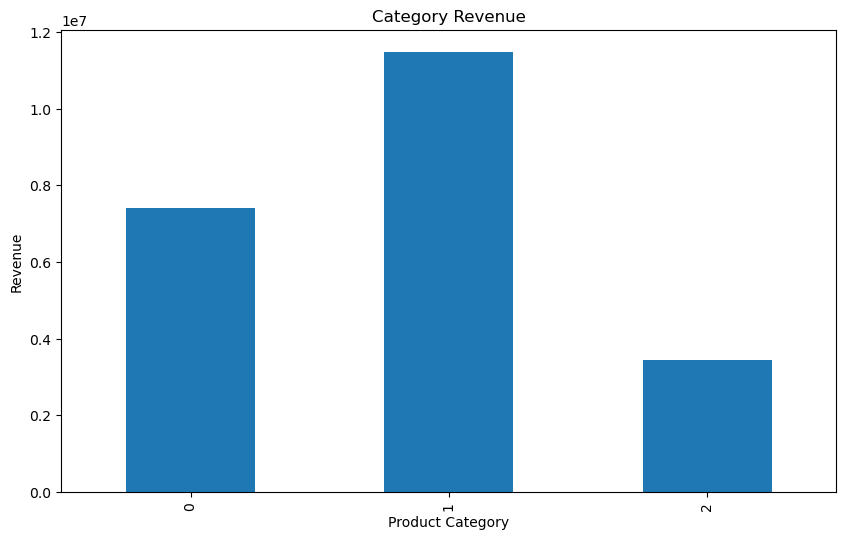

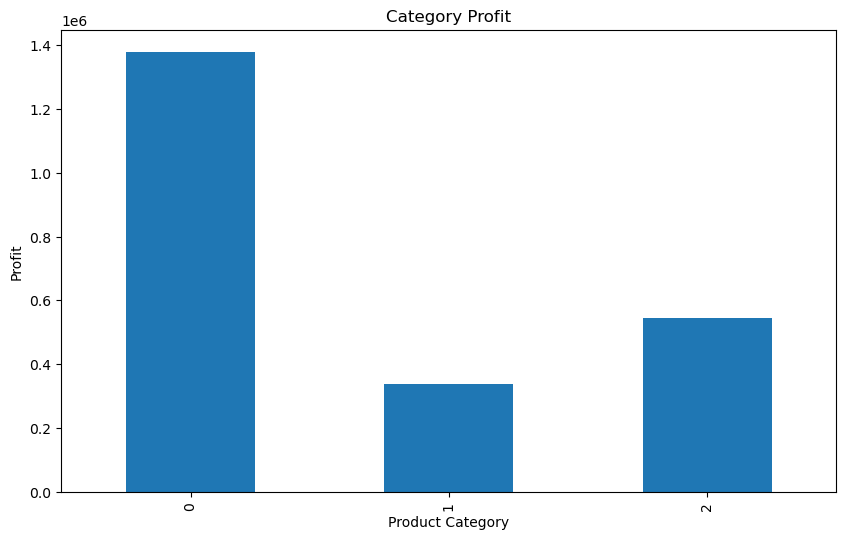

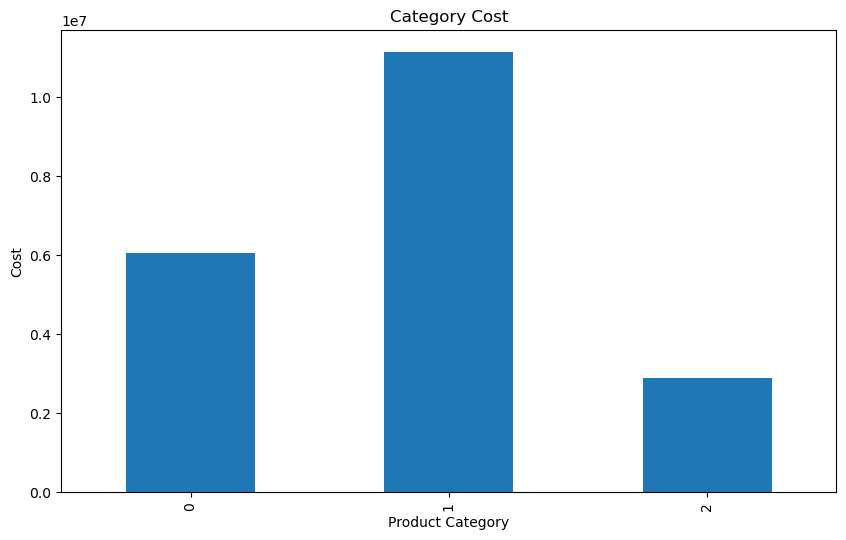

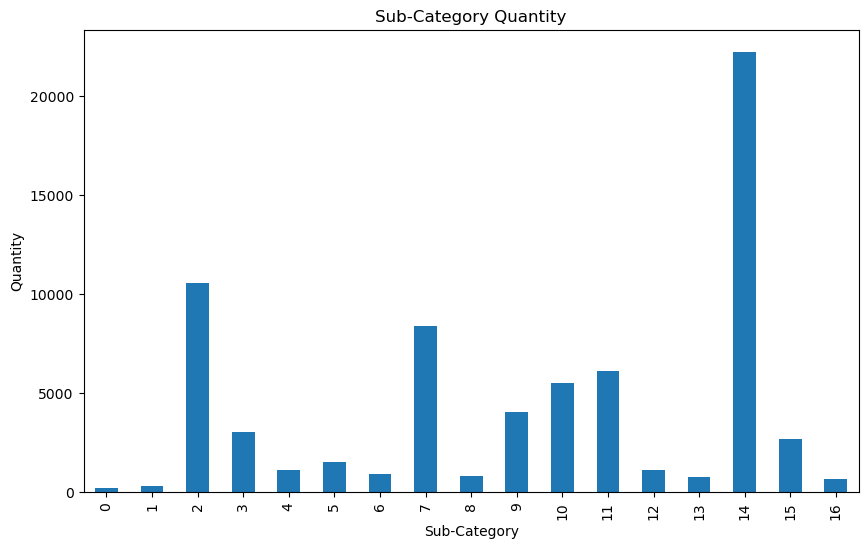

<Figure size 1000x600 with 0 Axes>

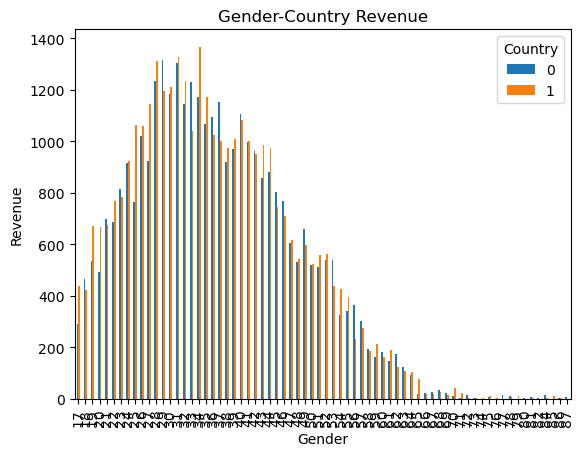

<Figure size 1000x600 with 0 Axes>

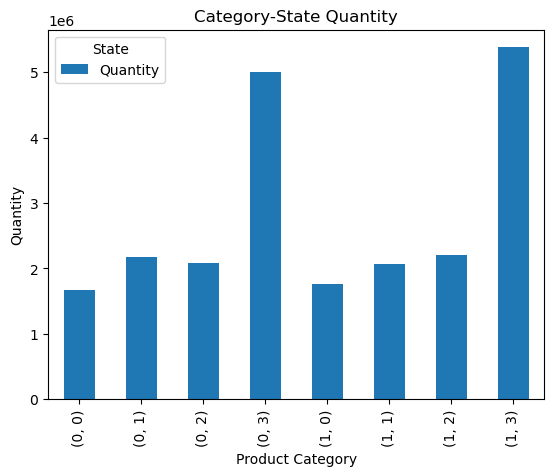

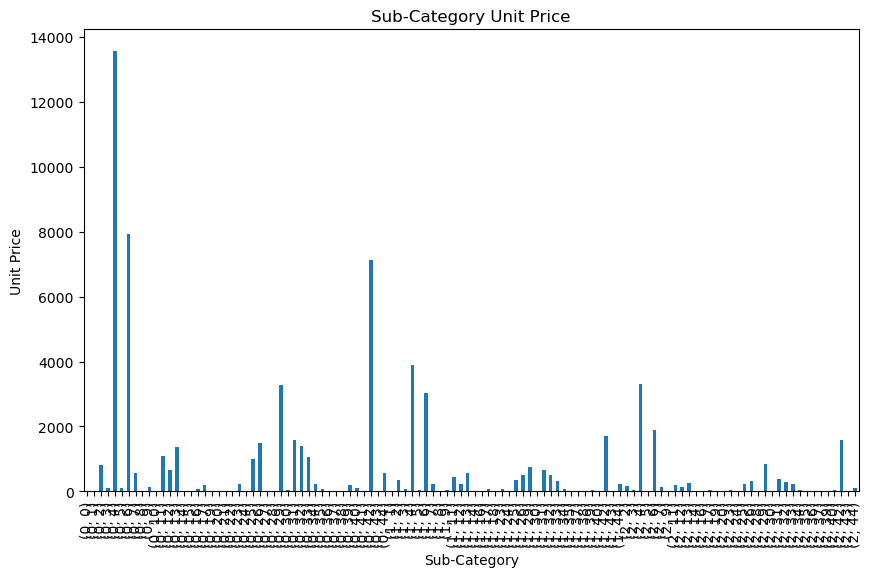

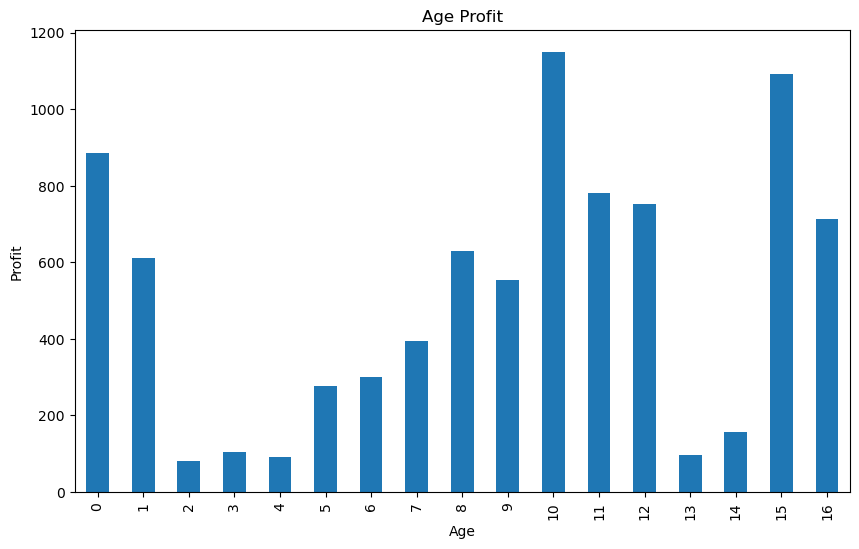

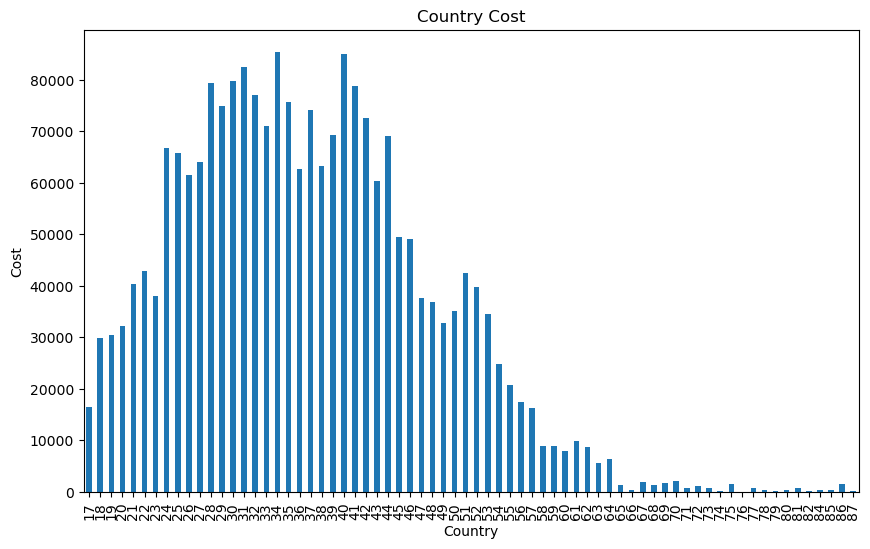

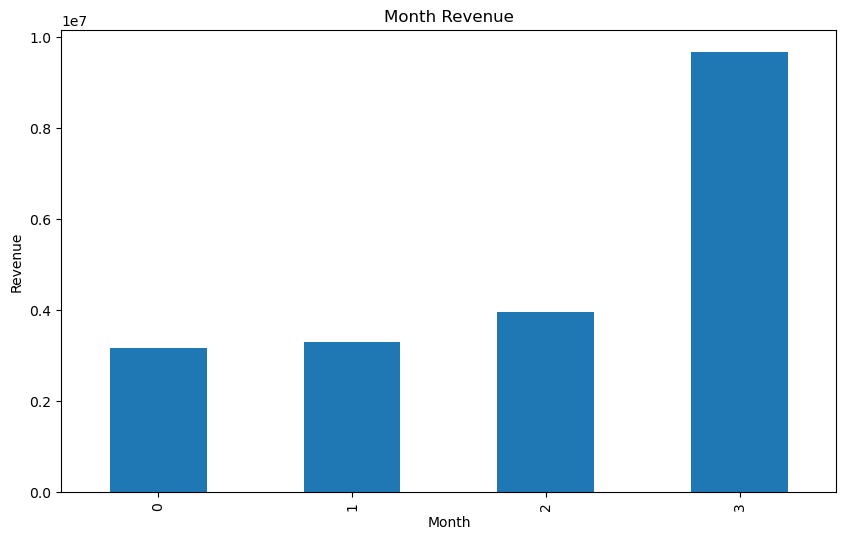

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Explore Relationship 1: Category Revenue
print("Explore Relationship 1: Category Revenue")
category_revenue_df = pd.DataFrame(category_revenue)
category_revenue_df.columns = ['Revenue']
print(category_revenue_df.to_markdown())
print()

# Explore Relationship 2: Category Profit
print("Explore Relationship 2: Category Profit")
category_profit_df = pd.DataFrame(category_profit)
category_profit_df.columns = ['Profit']
print(category_profit_df.to_markdown())
print()

# Explore Relationship 3: Category Cost
print("Explore Relationship 3: Category Cost")
category_cost_df = pd.DataFrame(category_cost)
category_cost_df.columns = ['Cost']
print(category_cost_df.to_markdown())
print()

# Explore Relationship 4: Sub-Category Quantity
print("Explore Relationship 4: Sub-Category Quantity")
sub_category_quantity_df = pd.DataFrame(sub_category_quantity)
sub_category_quantity_df.columns = ['Quantity']
print(sub_category_quantity_df.to_markdown())
print()

# Explore Relationship 6: Category Revenue
print("Explore Relationship 6: Category Revenue")
print(category_revenue_df.to_markdown())
print()

# Explore Relationship 7: Category Profit
print("Explore Relationship 7: Category Profit")
print(category_profit_df.to_markdown())
print()

# Explore Relationship 8: Category Cost
print("Explore Relationship 8: Category Cost")
print(category_cost_df.to_markdown())
print()

# Explore Relationship 9: Sub-Category Quantity
print("Explore Relationship 9: Sub-Category Quantity")
print(sub_category_quantity_df.to_markdown())
print()


# Explore Relationship 11: Gender-Country Revenue
print("Explore Relationship 11: Gender-Country Revenue")
gender_country_revenue_df = pd.DataFrame(gender_country_revenue)
print(gender_country_revenue_df.to_markdown())
print()


# Explore Relationship 12: Category-State Quantity
print("Explore Relationship 12: Category-State Quantity")
category_state_quantity_df = pd.DataFrame(category_state_quantity)
category_state_quantity_df.columns = ['Quantity']
print(category_state_quantity_df.to_markdown())
print()

# Explore Relationship 13: Sub-Category Unit Price
print("Explore Relationship 13: Sub-Category Unit Price")
sub_category_unit_price_df = pd.DataFrame(sub_category_unit_price)
sub_category_unit_price_df.columns = ['Unit Price']
print(sub_category_unit_price_df.to_markdown())
print()

# Explore Relationship 14: Age Profit
print("Explore Relationship 14: Age Profit")
age_profit_df = pd.DataFrame(age_profit)
age_profit_df.columns = ['Profit']
print(age_profit_df.to_markdown())
print()

# Explore Relationship 15: Country Cost
print("Explore Relationship 15: Country Cost")
country_cost_df = pd.DataFrame(country_cost)
country_cost_df.columns = ['Cost']
print(country_cost_df.to_markdown())
print()

# Explore Relationship 16: Month Revenue
print("Explore Relationship 16: Month Revenue")
month_revenue_df = pd.DataFrame(month_revenue)
month_revenue_df.columns = ['Revenue']
print(month_revenue_df.to_markdown())
print()

# Visualizations

# Explore Relationship 1: Category Revenue
plt.figure(figsize=(10, 6))
category_revenue.plot(kind='bar')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.title('Category Revenue')
plt.show()

# Explore Relationship 2: Category Profit
plt.figure(figsize=(10, 6))
category_profit.plot(kind='bar')
plt.xlabel('Product Category')
plt.ylabel('Profit')
plt.title('Category Profit')
plt.show()

# Explore Relationship 3: Category Cost
plt.figure(figsize=(10, 6))
category_cost.plot(kind='bar')
plt.xlabel('Product Category')
plt.ylabel('Cost')
plt.title('Category Cost')
plt.show()

# Explore Relationship 4: Sub-Category Quantity
plt.figure(figsize=(10, 6))
sub_category_quantity.plot(kind='bar')
plt.xlabel('Sub-Category')
plt.ylabel('Quantity')
plt.title('Sub-Category Quantity')
plt.show()


# Explore Relationship 11: Gender-Country Revenue
plt.figure(figsize=(10, 6))
gender_country_revenue_df.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Revenue')
plt.title('Gender-Country Revenue')
plt.legend(title='Country')
plt.show()

# Explore Relationship 12: Category-State Quantity
plt.figure(figsize=(10, 6))
category_state_quantity_df.plot(kind='bar')
plt.xlabel('Product Category')
plt.ylabel('Quantity')
plt.title('Category-State Quantity')
plt.legend(title='State')
plt.show()

# Explore Relationship 13: Sub-Category Unit Price
plt.figure(figsize=(10, 6))
sub_category_unit_price.plot(kind='bar')
plt.xlabel('Sub-Category')
plt.ylabel('Unit Price')
plt.title('Sub-Category Unit Price')
plt.show()

# Explore Relationship 14: Age Profit
plt.figure(figsize=(10, 6))
age_profit.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Profit')
plt.title('Age Profit')
plt.show()

# Explore Relationship 15: Country Cost
plt.figure(figsize=(10, 6))
country_cost.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Cost')
plt.title('Country Cost')
plt.show()

# Explore Relationship 16: Month Revenue
plt.figure(figsize=(10, 6))
month_revenue.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Month Revenue')
plt.show()


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

def perform_classification(df):
    """
    Perform classification on the given dataset using a decision tree classifier.

    Args:
        df (DataFrame): The input dataset.

    Returns:
        tuple: A tuple containing the trained pipeline, test features, and test labels.
    """
    # Split the data into features (X) and labels (y)
    X = df[['quantity', 'unit_cost', 'unit_price', 'cost', 'revenue']]
    y = df['cluster']

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a decision tree classifier
    classifier = DecisionTreeClassifier()

    # Create a pipeline for classification
    pipeline = Pipeline([
        ('classification', classifier)
    ])

    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)

    # Predict the labels for the test data
    y_pred = pipeline.predict(X_test)

    # Generate a classification report
    report = classification_report(y_test, y_pred)

    # Print the classification report
    print("Classification Report:")
    print(report)

    # Return the pipeline, test features, and test labels
    return pipeline, X_test, y_test


In [21]:
perform_classification(df)

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.65      0.61      2208
           1       0.92      0.93      0.93      1052
           2       0.29      0.28      0.28      1498
           3       0.49      0.42      0.45      2216

    accuracy                           0.54      6974
   macro avg       0.57      0.57      0.57      6974
weighted avg       0.54      0.54      0.54      6974



(Pipeline(steps=[('classification', DecisionTreeClassifier())]),
        quantity  unit_cost  unit_price    cost  revenue
 34434         3      23.33       30.00    70.0     90.0
 29668         3      31.67       32.00    95.0     96.0
 9946          3      44.00       59.00   132.0    177.0
 396           1     400.00      498.00   400.0    498.0
 28005         1     416.00      477.00   416.0    477.0
 ...         ...        ...         ...     ...      ...
 3509          3     291.67      326.67   875.0    980.0
 8194          3     567.00      579.67  1701.0   1739.0
 27770         2      25.00       30.50    50.0     61.0
 22541         2      49.50       62.50    99.0    125.0
 25727         2     270.00      289.00   540.0    578.0
 
 [6974 rows x 5 columns],
 34434    0
 29668    0
 9946     0
 396      2
 28005    0
         ..
 3509     3
 8194     1
 27770    0
 22541    0
 25727    3
 Name: cluster, Length: 6974, dtype: int32)

In [23]:
def generate_classification_recommendations(df, pipeline):
    X_recommend = df[['quantity', 'unit_cost', 'unit_price', 'cost', 'revenue']]
    predictions = pipeline.predict(X_recommend)
    return predictions

pipeline, X_test, y_test = perform_classification(df)
classification_predictions = generate_classification_recommendations(df, pipeline)
print(classification_predictions)

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.65      0.61      2208
           1       0.92      0.93      0.93      1052
           2       0.29      0.28      0.29      1498
           3       0.49      0.42      0.45      2216

    accuracy                           0.54      6974
   macro avg       0.57      0.57      0.57      6974
weighted avg       0.54      0.54      0.54      6974

[3 0 3 ... 1 1 1]


In [24]:
def model_recommender_system(df):
    clustered_df = perform_clustering(df)
    pipeline, X_test, y_test = perform_classification(clustered_df)
    return pipeline, X_test, y_test

pipeline, X_test, y_test = model_recommender_system(df)
classification_predictions = generate_classification_recommendations(df, pipeline)
print(classification_predictions)

Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.33      0.30      1530
           1       0.58      0.60      0.59      2186
           2       0.92      0.93      0.92      1054
           3       0.47      0.40      0.43      2204

    accuracy                           0.53      6974
   macro avg       0.56      0.56      0.56      6974
weighted avg       0.53      0.53      0.53      6974

[3 1 3 ... 2 2 2]


In [25]:
model_recommender_system(df)

Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.31      0.29      1512
           1       0.58      0.60      0.59      2209
           2       0.93      0.93      0.93      1048
           3       0.49      0.42      0.45      2205

    accuracy                           0.53      6974
   macro avg       0.57      0.57      0.57      6974
weighted avg       0.54      0.53      0.53      6974



(Pipeline(steps=[('classification', DecisionTreeClassifier())]),
        quantity  unit_cost  unit_price    cost  revenue
 34434         3      23.33       30.00    70.0     90.0
 29668         3      31.67       32.00    95.0     96.0
 9946          3      44.00       59.00   132.0    177.0
 396           1     400.00      498.00   400.0    498.0
 28005         1     416.00      477.00   416.0    477.0
 ...         ...        ...         ...     ...      ...
 3509          3     291.67      326.67   875.0    980.0
 8194          3     567.00      579.67  1701.0   1739.0
 27770         2      25.00       30.50    50.0     61.0
 22541         2      49.50       62.50    99.0    125.0
 25727         2     270.00      289.00   540.0    578.0
 
 [6974 rows x 5 columns],
 34434    1
 29668    1
 9946     1
 396      0
 28005    1
         ..
 3509     3
 8194     2
 27770    1
 22541    1
 25727    3
 Name: cluster, Length: 6974, dtype: int32)

In [26]:
def evaluate(pipeline, X_test, y_test):
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

accuracy = model_recommender_system(df)
print(f"Accuracy: {accuracy}")

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.54      0.51      2223
           1       0.92      0.94      0.93      1052
           2       0.26      0.24      0.25      1476
           3       0.59      0.55      0.57      2223

    accuracy                           0.54      6974
   macro avg       0.56      0.57      0.57      6974
weighted avg       0.54      0.54      0.54      6974

Accuracy: (Pipeline(steps=[('classification', DecisionTreeClassifier())]),        quantity  unit_cost  unit_price    cost  revenue
34434         3      23.33       30.00    70.0     90.0
29668         3      31.67       32.00    95.0     96.0
9946          3      44.00       59.00   132.0    177.0
396           1     400.00      498.00   400.0    498.0
28005         1     416.00      477.00   416.0    477.0
...         ...        ...         ...     ...      ...
3509          3     291.67      326.67   875.0    980.0
8194          3    

In [31]:
def generate_classification_recommendations(df, pipeline):
    # Generate recommendations based on classification model
    X_recommend = df[['quantity', 'unit_cost', 'unit_price', 'cost', 'revenue']]
    predictions = pipeline.predict(X_recommend)
    return predictions

In [32]:
generate_classification_recommendations(df, pipeline)

array([3, 1, 3, ..., 2, 2, 2], dtype=int32)

In [33]:
def generate_filtering_recommendations(df):
    # Generate recommendations based on filtering
    recommendations = []

    for customer_id in df['record_id'].unique():
        items_to_predict = df[df['record_id'] == customer_id]['sub_category'].values
        for item in items_to_predict:
            recommendations.append((customer_id, item))

    return recommendations

In [34]:
generate_filtering_recommendations(df)

[(30208, 14),
 (45425, 6),
 (2291, 14),
 (26601, 14),
 (46373, 14),
 (3175, 14),
 (28848, 14),
 (7945, 14),
 (45256, 14),
 (31618, 14),
 (30039, 7),
 (36579, 14),
 (48279, 14),
 (9620, 14),
 (11497, 7),
 (5793, 14),
 (28988, 14),
 (33307, 14),
 (19795, 7),
 (32959, 14),
 (50020, 7),
 (33714, 14),
 (19295, 7),
 (20902, 14),
 (13546, 14),
 (28545, 14),
 (30417, 14),
 (10427, 14),
 (16195, 7),
 (40161, 14),
 (18012, 14),
 (15325, 7),
 (3068, 14),
 (42762, 14),
 (21192, 14),
 (19400, 7),
 (30029, 14),
 (46582, 14),
 (12246, 7),
 (19652, 14),
 (41856, 14),
 (21988, 7),
 (34093, 14),
 (5442, 14),
 (9115, 14),
 (27517, 14),
 (38488, 7),
 (41556, 1),
 (5433, 1),
 (31521, 10),
 (36450, 10),
 (42988, 10),
 (41183, 10),
 (17272, 10),
 (7622, 8),
 (9544, 10),
 (25760, 10),
 (40523, 9),
 (42869, 9),
 (22079, 9),
 (15489, 5),
 (42655, 9),
 (35978, 9),
 (27778, 9),
 (1338, 9),
 (39877, 4),
 (7245, 7),
 (49198, 7),
 (47452, 7),
 (49577, 7),
 (23611, 7),
 (23051, 13),
 (35582, 13),
 (30701, 10),
 (3900

In [35]:
def generate_recommendations(df, pipeline):
    classification_recommendations = generate_classification_recommendations(df, pipeline)
    filtering_recommendations = generate_filtering_recommendations(df)
    return classification_recommendations, filtering_recommendations

In [36]:
generate_recommendations(df, pipeline)

(array([3, 1, 3, ..., 2, 2, 2], dtype=int32),
 [(30208, 14),
  (45425, 6),
  (2291, 14),
  (26601, 14),
  (46373, 14),
  (3175, 14),
  (28848, 14),
  (7945, 14),
  (45256, 14),
  (31618, 14),
  (30039, 7),
  (36579, 14),
  (48279, 14),
  (9620, 14),
  (11497, 7),
  (5793, 14),
  (28988, 14),
  (33307, 14),
  (19795, 7),
  (32959, 14),
  (50020, 7),
  (33714, 14),
  (19295, 7),
  (20902, 14),
  (13546, 14),
  (28545, 14),
  (30417, 14),
  (10427, 14),
  (16195, 7),
  (40161, 14),
  (18012, 14),
  (15325, 7),
  (3068, 14),
  (42762, 14),
  (21192, 14),
  (19400, 7),
  (30029, 14),
  (46582, 14),
  (12246, 7),
  (19652, 14),
  (41856, 14),
  (21988, 7),
  (34093, 14),
  (5442, 14),
  (9115, 14),
  (27517, 14),
  (38488, 7),
  (41556, 1),
  (5433, 1),
  (31521, 10),
  (36450, 10),
  (42988, 10),
  (41183, 10),
  (17272, 10),
  (7622, 8),
  (9544, 10),
  (25760, 10),
  (40523, 9),
  (42869, 9),
  (22079, 9),
  (15489, 5),
  (42655, 9),
  (35978, 9),
  (27778, 9),
  (1338, 9),
  (39877, 4),


In [ ]:
# Model the recommender system
pipeline, X_test, y_test = model_recommender_system(df)

In [ ]:
# Evaluate the classification model
classification_accuracy = evaluate(pipeline, X_test, y_test)

In [ ]:
classification_accuracy

In [ ]:
# Generate recommendations
classification_recommendations, filtering_recommendations = generate_recommendations(df, pipeline)

In [ ]:
classification_recommendations

In [ ]:
filtering_recommendations